# Kaggle project - Surviving the Titanic

I'm going to work through the Kaggle Titanic project as an exercise in learning about Python. I'm definitely not trying to win anything; I'm only trying to expand my skill set.

The tutorial uses base python but I'm going to use sFrame, which is just GraphLab's data wrapper. It's open source and pretty cool.

## 0. Import packages

In [316]:
import sframe
import numpy as np
import pandas as pd
import itertools

## 1. Read in the data

In [317]:
train_data = sframe.SFrame.read_csv('D:\\Jason\\Data\\titanic\\train.csv')

Finished parsing file D:\Jason\Data\titanic\train.csv

Parsing completed. Parsed 100 lines in 0.01504 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,long,str,str,float,long,long,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file D:\Jason\Data\titanic\train.csv

Parsing completed. Parsed 891 lines in 0.01504 secs.

In [318]:
train_data.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171
2,1,1,"Cumings, Mrs. JohnBradley (Florence Briggs ...",female,38.0,1,0,PC 17599
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282
4,1,1,"Futrelle, Mrs. JacquesHeath (Lily May Peel) ...",female,35.0,1,0,113803
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450
6,0,3,"Moran, Mr. James",male,None,0,0,330877
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463
8,0,3,"Palsson, Master. GostaLeonard ...",male,2.0,3,1,349909
9,1,3,"Johnson, Mrs. Oscar W(Elisabeth Vilhelmina ...",female,27.0,0,2,347742
10,1,2,"Nasser, Mrs. Nicholas(Adele Achem) ...",female,14.0,1,0,237736


In [319]:
test_data = sframe.SFrame.read_csv('D:\\Jason\\Data\\titanic\\test.csv')

Finished parsing file D:\Jason\Data\titanic\test.csv

Parsing completed. Parsed 100 lines in 0.014037 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,str,str,float,long,long,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file D:\Jason\Data\titanic\test.csv

Parsing completed. Parsed 418 lines in 0.014037 secs.

In [320]:
test_data.head()

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (EllenNeeds) ...",female,47.0,1,0,363272,7.0,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander(Helga E Lindqvist) ...",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. JohanCervin ...",male,14.0,0,0,7538,9.225,,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q
899,2,"Caldwell, Mr. AlbertFrancis ...",male,26.0,1,1,248738,29.0,,S
900,3,"Abrahim, Mrs. Joseph(Sophie Halaut Easu) ...",female,18.0,0,0,2657,7.2292,,C
901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.15,,S


## 1. Play with the data

In this section, I will explore the training data and see if there is any cleaning necessary.

### 1.1 Gender
Are there any other genders besides the two traditional ones?

In [321]:
set(train_data['Sex'])

{'female', 'male'}

### 1.2 Female vs male survivors

In [322]:
num_passengers = len(train_data)
male_pass = train_data[train_data['Sex']=='male']
female_pass = train_data[train_data['Sex']=='female']

In [323]:
male_surv = np.sum(male_pass['Survived'].to_numpy())
female_surv = np.sum(female_pass['Survived'].to_numpy())

In [324]:
num_male_pass = len(male_pass)
num_female_pass = len(female_pass)

In [325]:
print 'The survival rate for male passengers was {} / {} = {:.2%}'.format(male_surv, num_male_pass, male_surv/float(num_male_pass))

The survival rate for male passengers was 109 / 577 = 18.89%


In [326]:
print 'The survival rate for female passengers was {} / {} = {:.2%}'.format(female_surv, num_female_pass, female_surv/float(num_female_pass))

The survival rate for female passengers was 233 / 314 = 74.20%


What this tells me is that a model that simply assigns all females to be survivors and all males to be dead would have accuracy = 74.2%. I'll now set up a confusion matrix.

### 1.3 Confusion matrix of gender model

In [327]:
print '\t\tPredicted = 1\tPredicted = 0'
print '---------------------------------------------'
print 'True = 1\t' + str(female_surv) + '\t\t' + str(male_surv)
print 'True = 0\t' + str(num_female_pass-female_surv) + '\t\t' + str(num_male_pass-male_surv)
print ''
print 'Accuracy: {:.2%}'.format((female_surv+num_male_pass-male_surv)/float(len(train_data)))

		Predicted = 1	Predicted = 0
---------------------------------------------
True = 1	233		109
True = 0	81		468

Accuracy: 78.68%


### 1.4 Precision and recall of gender model

* Precision = Predicted and actual positives / predicted positives
* Recall = Predicted and actual positives / true positives

In [328]:
print 'Precision = {:.4}'.format(female_surv / float(num_female_pass))

Precision = 0.742


In [329]:
print 'recall = {:.4}'.format(female_surv / float(female_surv + male_surv))

recall = 0.6813


At this point we would create a submission file, with the passenger ID in the first column and the prediction in the second, **BASED ON TEST DATA.** Let's do that now.

### 1.5 Prepare gender model for submission

In [330]:
test_data['gender_pred'] = test_data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [331]:
test_export = test_data['PassengerId', 'gender_pred']

In [332]:
test_export.export_csv("D:\\Jason\\Projects\\titanic\\gender_model.csv")

## 2. Can we add anything else?

Class, of course, had a lot to do with this. In this data, the following are class distinctions (feature = 'Pclass', a proxy for SES):

* 1 = Upper class
* 2 = Middle class
* 3 = Lower class

And for fun, we'll add ticket price (in contemporary currency), which in this data is a continuous variable. The competition data says to bin things in increments of 10, treating all values of $40 and over as the same bin, but let's explore the data and learn something about plotting while we're at it.

In [333]:
import matplotlib.pyplot as plt
%matplotlib inline

In [334]:
fares = train_data['Fare'].sort()
med_fare = np.median(fares)
print med_fare
fare75 = np.percentile(fares, 75.0)
print fare75

14.4542
31.0


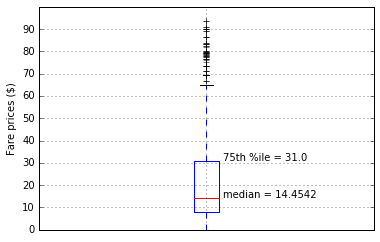

In [335]:
plt.boxplot(fares)
plt.ylabel("Fare prices ($)")
plt.text(1.1, 14.45, "median = " + str(med_fare))
plt.text(1.1, 31.0, "75th %ile = " + str(fare75))
plt.tick_params(axis='x',which='both',top='off',bottom='off',labelbottom='off')
plt.grid(True)
plt.axis([0,2,0,100])
plt.yticks(xrange(0,100,10))
fig = plt.figure(num=1, figsize=(8,8),dpi=72)
plt.show()

The tutorial censors the fares at 39; I am going to group them differently - so, 7 bins instead of 4.

### 2.1 Set up the bins for fares

* 0 = 0 <= x < 10
* 1 = 10 <= x < 20
* ... and so on
* 6 = 60 and above

In [336]:
def bin_fares(fares, censorFares=60, binWidth=10):
    try:
        if fares >= censorFares:
            return censorFares // binWidth
        else: 
            return fares // binWidth
    except:
        return 15 // binWidth

In [337]:
print bin_fares(8)
print bin_fares(18)
print bin_fares(58)
print bin_fares(78)
print bin_fares(None)

0
1
5
6
1


In [338]:
train_data['fare_bin'] = train_data['Fare'].apply(bin_fares)

In [339]:
train_data.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171
2,1,1,"Cumings, Mrs. JohnBradley (Florence Briggs ...",female,38.0,1,0,PC 17599
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282
4,1,1,"Futrelle, Mrs. JacquesHeath (Lily May Peel) ...",female,35.0,1,0,113803
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450
6,0,3,"Moran, Mr. James",male,None,0,0,330877
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463
8,0,3,"Palsson, Master. GostaLeonard ...",male,2.0,3,1,349909
9,1,3,"Johnson, Mrs. Oscar W(Elisabeth Vilhelmina ...",female,27.0,0,2,347742
10,1,2,"Nasser, Mrs. Nicholas(Adele Achem) ...",female,14.0,1,0,237736


### 2.2 Build a survival table

In [340]:
genders = np.unique(train_data['Sex'])
sesClasses = np.unique(train_data['Pclass'])
farebins = np.unique(train_data['fare_bin'])
print genders
print sesClasses
print farebins

['female' 'male']
[1 2 3]
[ 0.  1.  2.  3.  4.  5.  6.]


In [341]:
sexCol = []
sesCol = []
fareCol = []
probCol=[]

In [342]:
for g in genders:
    for c in sesClasses:
        for f in farebins:
            sexCol.append(g)
            sesCol.append(c)
            fareCol.append(f)
            
            data = train_data[(train_data['Sex']==g)&(train_data['Pclass']==c)&(train_data['fare_bin']==f)]
            surv = np.sum(data['Survived'].to_numpy())
            num = float(len(data))
            if (num == 0):
                prob = 0
            else:
                prob = surv/num
            probCol.append( prob )

In [343]:
print len(sexCol)
print len(sesCol)
print len(fareCol)

42
42
42


In [344]:
surv_table = sframe.SFrame({'Sex':sexCol,'Pclass':sesCol,'fare_bin':fareCol, 'prob':probCol})

In [345]:
surv_table['pred'] = surv_table['prob'].apply(lambda x: 1 if x >=0.5 else 0)

In [346]:
surv_table

Pclass,Sex,fare_bin,prob,pred
1,female,0.0,0.0,0
1,female,1.0,0.0,0
1,female,2.0,0.833333333333,1
1,female,3.0,1.0,1
1,female,4.0,1.0,1
1,female,5.0,1.0,1
1,female,6.0,0.970149253731,1
2,female,0.0,0.0,0
2,female,1.0,0.914285714286,1
2,female,2.0,0.9,1


### 2.3 Join the survival table to test data to make predictions

In [347]:
train_data['gcf_pred'] = 0

In [348]:
test_data['gcf_pred'] = 0

In [349]:
pred_train_data = train_data.join(surv_table, on=['Sex','Pclass','fare_bin'], how='inner') 

In [350]:
test_data['Fare'].fillna(10.0)

dtype: float
Rows: 418
[7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, 7.6292, 29.0, 7.2292, 24.15, 7.8958, 26.0, 82.2667, 26.0, 61.175, 27.7208, 12.35, 7.225, 7.925, 7.225, 59.4, 3.1708, 31.6833, 61.3792, 262.375, 14.5, 61.9792, 7.225, 30.5, 21.6792, 26.0, 31.5, 20.575, 23.45, 57.75, 7.2292, 8.05, 8.6625, 9.5, 56.4958, 13.4167, 26.55, 7.85, 13.0, 52.5542, 7.925, 29.7, 7.75, 76.2917, 15.9, 60.0, 15.0333, 23.0, 263.0, 15.5792, 29.125, 7.8958, 7.65, 16.1, 262.375, 7.8958, 13.5, 7.75, 7.725, 262.375, 21.0, 7.8792, 42.4, 28.5375, 263.0, 7.75, 7.8958, 7.925, 27.7208, 211.5, 211.5, 8.05, 25.7, 13.0, 7.75, 15.2458, 221.7792, 26.0, 7.8958, 10.7083, 14.4542, 7.8792, 8.05, 7.75, 23.0, 13.9, 7.775, 52.0, 8.05, 26.0, 7.7958, 78.85, 7.925, 7.8542, 8.05, ... ]

In [351]:
test_data['fare_bin'] = test_data['Fare'].apply(bin_fares)

In [352]:
pred_test_data = test_data.join(surv_table, on=['Sex','Pclass','fare_bin'], how='inner') 

In [353]:
bin_fares(test_data[test_data['PassengerId']==1044]['Fare'])

1

In [354]:
test_data[test_data['PassengerId']==1044]

Columns:
	PassengerId	int
	Pclass	int
	Name	str
	Sex	str
	Age	float
	SibSp	int
	Parch	int
	Ticket	str
	Fare	float
	Cabin	str
	Embarked	str
	gender_pred	int
	gcf_pred	int
	fare_bin	float

Rows: Unknown

Data:
+-------------+--------+--------------------+------+------+-------+-------+--------+
| PassengerId | Pclass |        Name        | Sex  | Age  | SibSp | Parch | Ticket |
+-------------+--------+--------------------+------+------+-------+-------+--------+
|     1044    |   3    | Storey, Mr. Thomas | male | 60.5 |   0   |   0   |  3701  |
+-------------+--------+--------------------+------+------+-------+-------+--------+
+------+-------+----------+-------------+----------+----------+
| Fare | Cabin | Embarked | gender_pred | gcf_pred | fare_bin |
+------+-------+----------+-------------+----------+----------+
| 15.0 |       |    S     |      0      |    0     |   1.0    |
+------+-------+----------+-------------+----------+----------+
[? rows x 14 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

### 2.4 Compute training precision and recall

In [355]:
train_truepos = len(pred_train_data[(pred_train_data['Survived']==1)&(pred_train_data['pred']==1)])
train_falsepos = len(pred_train_data[(pred_train_data['Survived']==0)&(pred_train_data['pred']==1)])
train_falseneg = len(pred_train_data[(pred_train_data['Survived']==1)&(pred_train_data['pred']==0)])
train_trueneg = len(pred_train_data[(pred_train_data['Survived']==0)&(pred_train_data['pred']==0)])

In [356]:
train_precision = train_truepos / float(train_truepos+train_falsepos)
train_recall = train_truepos / float(train_truepos+train_falseneg)

In [357]:
print 'Training precision: {:.2%}'.format(train_precision)
print 'Training recall: {:.2%}'.format(train_recall)

Training precision: 80.63%
Training recall: 66.96%


### 2.5 Confusion matrix for this new model

In [358]:
print '\t\tPredicted = 1\tPredicted = 0'
print '---------------------------------------------'
print 'True = 1\t' + str(train_truepos) + '\t\t' + str(train_falseneg)
print 'True = 0\t' + str(train_falsepos) + '\t\t' + str(train_trueneg)
print ' '
print 'Accuracy = {:.2%}'.format((train_truepos + train_trueneg)/float(len(train_data)))

		Predicted = 1	Predicted = 0
---------------------------------------------
True = 1	229		113
True = 0	55		494
 
Accuracy = 81.14%


This means that I got a 6% increase in precision for a 2% decrease in recall. In other words, I have made the model a little less optimistic. I have also gained 3% in accuracy with the addition of a few more false negatives.

### 2.6 Prepare to submit this model

In [359]:
test_export = pred_test_data['PassengerId','pred']
test_export.rename({'pred':'Survived'})
test_export.export_csv("D:\\Jason\\Projects\\titanic\\gcf_model.csv")

In [360]:
len(pred_test_data)

418

In [361]:
len(test_data)

418